a sample of 40 right-handed Anglo Introductory Psychology students at a large Southwestern university 

# Part 1: The Dataset

In [1]:
import pandas as pd #librray
brainFile = 'brainsize.txt' #download from kaggle.com
brainFrame = pd.read_csv(brainFile) #txt to csv

In [5]:
brainFrame

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


In [3]:
brainFrame.isnull().any() #missing value

Gender       False
FSIQ         False
VIQ          False
PIQ          False
Weight        True
Height        True
MRI_Count    False
dtype: bool

In [4]:
brainFrame.isnull().sum() #missing value

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

In [6]:
brainFrame.isna().mean() #%misiing_value

Gender       0.000
FSIQ         0.000
VIQ          0.000
PIQ          0.000
Weight       0.050
Height       0.025
MRI_Count    0.000
dtype: float64

In [7]:
#input missing value from weight by mean
brainFrame=brainFrame.copy() #dataset
mean=brainFrame['Weight'].mean() #rata-rata
brainFrame['Weight']=brainFrame['Weight'].fillna(value=brainFrame['Weight'].mean()) #value

In [8]:
brainFrame['Weight'].isna().sum() #check

0

In [9]:
#input missing value from height by mean
brainFrame2=brainFrame.copy() #dataset
mean=brainFrame['Height'].mean() #rata-rata
brainFrame['Height']=brainFrame['Height'].fillna(value=brainFrame['Height'].mean()) #value

In [10]:
brainFrame['Height'].isna().sum() #check

0

# Part 2: Scatterplot Graphs and Correlatable Variables

We can see all the statistical analysis for the dataset from the above table, e.g. count (the total data in a dataset), mean, standard deviation, the minimum value, 1st quatile, 2nd quartile, 3rd quartile, and the maximum value in the dataset.

In [11]:
brainFrame.describe() 

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,40.000000,40.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,22.868574,3.943103,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.750000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,147.500000,68.250000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [12]:
import numpy as np #library
import matplotlib.pyplot as plt #library

In [13]:
menDf = brainFrame[(brainFrame.Gender == 'Male')] 
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

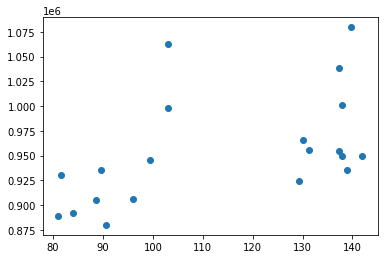

In [14]:
#Men Scatter Plot
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

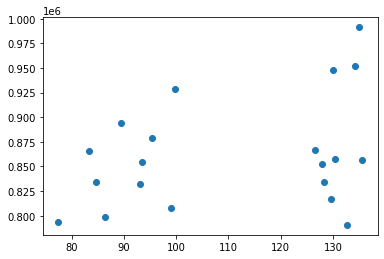

In [15]:
#Women Scatter Plot
womenMeanSmarts = womenDf[['PIQ', 'FSIQ', 'VIQ']].mean(axis = 1)
plt.scatter(womenMeanSmarts, womenDf['MRI_Count'])
plt.show()
%matplotlib inline

# Part 3: Calculating Correlation with Python

In [16]:
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.238744,-0.272669,0.498369
VIQ,0.944400,1.000000,0.766021,-0.311935,-0.273847,0.413105
PIQ,0.930694,0.766021,1.000000,-0.122908,-0.221510,0.568237
Weight,-0.238744,-0.311935,-0.122908,1.000000,0.404969,-0.058694
Height,-0.272669,-0.273847,-0.221510,0.404969,1.000000,0.337480
MRI_Count,0.498369,0.413105,0.568237,-0.058694,0.337480,1.000000


In [17]:
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


# Part 4: Visualizing

From the women correlation heatmap we can see that FSIQ, VIQ, and PIQ have positive correlation between each other.
MRI_Count has slightly correlation between all the variables for the correlation values are between 0.2 to 0.6.

<AxesSubplot:>

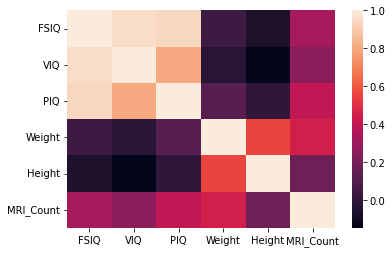

In [18]:
#correlation from female
import seaborn as sns #librray
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

From the men correlation heatmap we can see that FSIQ, VIQ, and PIQ have positive correlation between each other.
MRI_Count has a fairly high correlation between all the variables for the correlation values are between 0.4 to 0.8.

<AxesSubplot:>

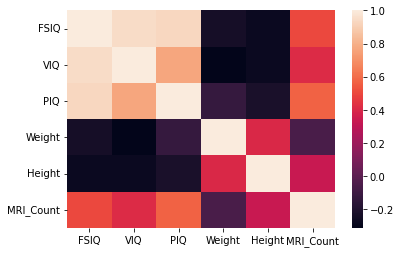

In [19]:
#correlation from male
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Thank You :)